# Ομάδα 9 
Νικόλαος Γιωργουλάκης - 03117138 <br />
Οδυσσέας Σπυρίδων Χλαπάνης - 03117023<br />
Δημήτρης Μπεκρής - 03117116

## Upgrade and Install Packages

In [ ]:
# !pip install --upgrade pip
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade nltk
# !pip install --upgrade scikit-learn
# !pip install --upgrade joblib
# ! pip install pickle-mixin
# ! pip install gensim

## Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import gensim.downloader
import joblib
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer,PorterStemmer
nltk.download('stopwords') 
from nltk.corpus import stopwords

import re
import joblib
import pickle

import textwrap

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load Dataset

In [5]:
dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

## Take Corresponding Part of Dataset with our Team Number

In [6]:
team_seed_number = 9

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus



*   Ο πίνακας titles περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
*   O πίνακας categories περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy", "Indie", "Punk rock", "Addiction Drama", "Cult", "Musical", "Drama", "Biopic [feature]", "Romantic drama", "Romance Film", "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.


*   Ο πίνακας catbins περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή (one hot encoding). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
*   Ο πίνακας summaries και η λίστα corpus περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: 'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'


*   Θεωρούμε ως ID της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με ID=49 (την πεντηκοστή) θα γράψουμε print(corpus[49]).







In [ ]:
ID = 49
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Guided Mouse-ille']
['"Children\'s/Family"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

## Task 1. Movie Recommender


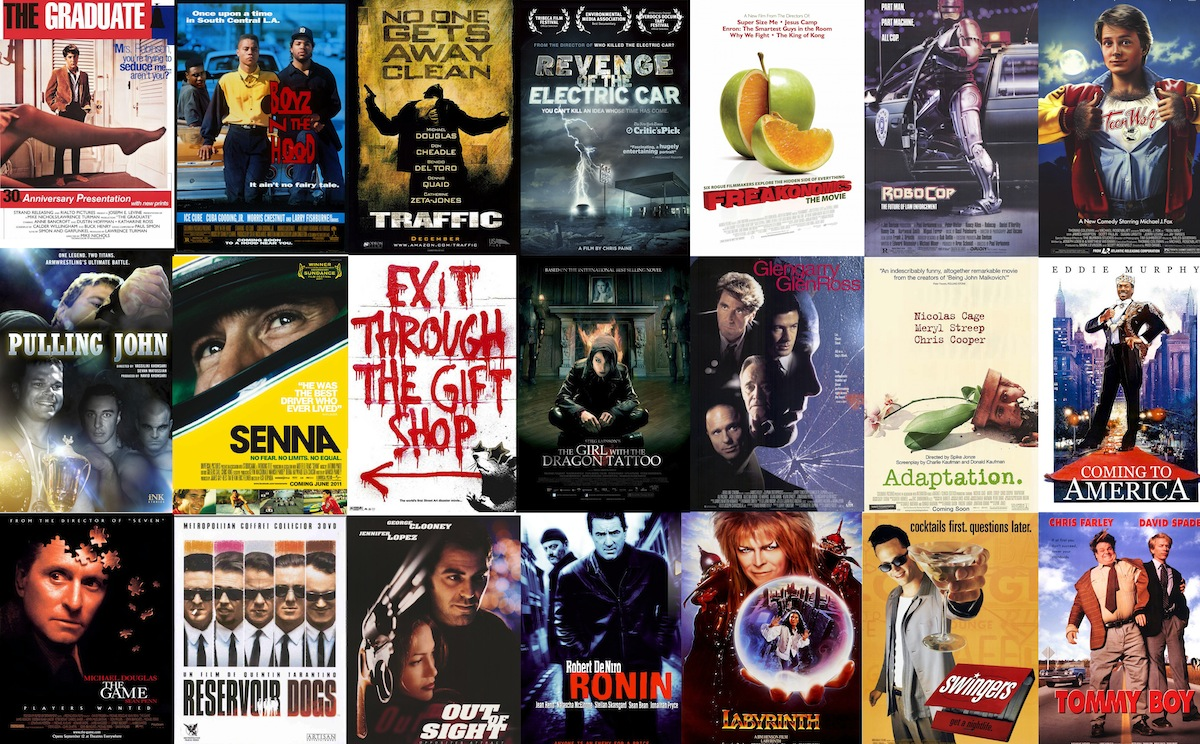
Στο πρώτο μέρος του εργαστηρίου αναπτύσσουμε ένα σύστημα συστάσεων ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Το σύστημα συστάσεων που αναπτύσσουμε βασίζεται στο περιεχόμενο και συγκεκριμένα στις συνόψεις των ταινιών (corpus).


### Define content_recommender 

Ορίζουμε εδώ τη συνάρτηση η οποία δέχεται ως παράμετρο το corpus μίας ταινίας, το συνολικό corpus των ταινιών και επιστρέφει τις max-recomendations το πλήθος ταινίες που βρίσκονται πλησιέστερα στην ταινία της εισόδου με βάση την απόσταση συνημιτόνου

In [28]:
def content_recommender(target_movie, max_recommendations, corpus_type, mismatch = False):
    recommended_movies = []
    
    cos_sim = cosine_similarity(corpus_type, corpus_type)

    similarity_scores = pd.Series(cos_sim[target_movie]).sort_values(ascending = mismatch)
    top_movies = list(similarity_scores.iloc[1:max_recommendations+1].index)

    return similarity_scores.iloc[1:max_recommendations+1], top_movies


### Προεπεξεργασία

Κατά την επεξεργασία των κειμένων, παρατηρήσαμε σε πολλά από αυτά την ύπαρξη λέξεων/λεκτικών και εκφράσεων, κάποιες φορές πολύ εξειδικευμένων(βλέπε επιστημονικοί όροι π.χ. σε ταινίες Επιστημονικής Φαντασίας) άλλες πολύ συνηθισμένων(άρθρα, προσδιριστικές αντωνυμίες κλπ) καθώς επίσης και σημεία στίξης. Επομένως, προχωρήσαμε στην απομακρυνσή τους, ακολουθώντας τα παρακάτω βήματα:

1. Διαγραφή html tags και urls
2. Διαγραφη ειδικών χαρακτήρων(σημεία στίξης κλπ) και αριθμητικών εκφράσεων(διατήρηση μόνο αλφαβητικών εκφράσεων)
3. Απαλοιφή stopwords
4. Απαλοιφή ολιγοσύλλαβων λέξεων
5. Εφαρμογή Stemming / Lemmatization
6. Απαλοιφή υψίσυχνων / χαμηλόσυχνων, ως προς την εμφάνιση τους στα documents, λέξεων

In [2]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords

def preprocess(sentence, stem=False, lem=False, url=False):
    
    # Convert to String
    sentence=str(sentence)
    # sentence=sentence.replace('html',"") 
    
    # Convert letters to lowercase 
    sentence = sentence.lower()

    # Remove html tags
    cleantext = re.sub(r'<.*>', ' ', sentence)
    # Remove urls
    cleantext = re.sub(r'http\S+', ' ',cleantext) if url else cleantext ## MAYBE!
    # Remove Special Characters/Punctuations
    cleantext = re.sub(r'[^A-Za-z ]+', ' ', cleantext)

    # Tokenize Corpus
    # This class applies, 
    # 1. Punctuation removing
    # 2. Tokenization
    tokenizer = RegexpTokenizer(r'\w+') 
    tokens = tokenizer.tokenize(cleantext)  

    # Remove StopWords
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    # Appply Stemming
    if stem:
      stemmer = PorterStemmer() 
      filtered_words=[stemmer.stem(w) for w in filtered_words]
    
    # Appply Lemmatization
    elif lem:
      lemmatizer = WordNetLemmatizer()
      filtered_words=[lemmatizer.lemmatize(w) for w in filtered_words]

    return " ".join(filtered_words)

In [ ]:
# Helpful function for printing a dictionary
def print_voc(voc):
  print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in voc.items() ) + "}")

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf. Αρχικά δοκιμάζουμε μία απλή αναπαράσταση, χωρίς preprocessing και χωρίς πείραγμα παραμέτρων.

#### Normal TfidfVector() 

In [ ]:
# create sparse tf_idf representation without preprocessing
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [ ]:
with open(f'/content/drive/MyDrive/tfidf_normal.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/tfidf_normal.pickle', 'rb') as handle:
  tfidf_normal = pickle.load(handle)

In [ ]:
tfidf_normal_v = tfidf_normal.transform(corpus)

In [ ]:
print(tfidf_normal_v.shape)
print(tfidf_normal_v.toarray()[0].shape)

(5000, 48772)
(48772,)


Βλέπουμε ότι το corpus που προκύπτει από την αναπαράσταση tfidf χωρίς παραμετροποίηση και προεπεξεργασία έχει 48772 λέξεις. Στη συνέχεια βλέπουμε ένα παράδειγμα χρήσης της αναπαράστασης που δημιουργήσαμε προκειμένου μέσω της συνάρτησης content_recommender να βρόυμε τρεις όμοιες ταινίες για την ταινία 0.

## Δοκιμή του Recommender

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))


rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_normal_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake
['Recommended movie: Slumdog Millionaire']
['Category: "Thriller",  "Crime Fiction",  "Indie",  "Inspirational Drama",  "Coming of age",  "Film adaptation",  "

Παρατηρούμε ότι παρότι οι πρώτες ταινίες σχετίζονται θεματικά με την πρώτη ταινία του dataset καθώς αφορούν τη ζωή στην Ινδία ή θρησκευτικά ζητήματα στην Ινδία, οι υπόλοιπες που έχουν μάλιστα και μικρότερη απόσταση, δεν σχετίζονται ιδιαίτερα με την ταινία που δοκιμάζουμε

## TfIdfVectorizer Optimization

Στη συνέχεια, δοκιμάζουμε τη χρήση διαφόρων παραμέτρων τόσο της προεπεξεργασίας όσο και του TfIdfVectorizer προκειμένου να λάβουμε καλύτερα αποτελέσματα. Παρατηρούμε ότι οι αλλαγές στις παραμέρους προκαλούν απότομες αλλαγές στις διαστάσεις του corpus μειώνοντας κατά πολύ τις χρησιμοποιούμενες λέξεις

#### Χρήση Προεπεξεργασίας

Στη συνέχεια δοκιμάζουμε να εκπαιδεύσουμε τον TfidfVectorizer χρησιμοποιώντας ως preprocessor την συνάρτηση preprocess που δημιουργήσαμε προηγουμένως. Η προεπεξεργασία εδώ περιλαμβάνει τα βήματα:
1. Διαγραφή html tags 
2. Διαγραφη ειδικών χαρακτήρων(σημεία στίξης κλπ) και αριθμητικών εκφράσεων(διατήρηση μόνο αλφαβητικών εκφράσεων)
3. Απαλοιφή stopwords
4. Απαλοιφή ολιγοσύλλαβων λέξεων


In [ ]:
# create sparse tf_idf representation with preprocessing
vectorizer = TfidfVectorizer(preprocessor=preprocess)
vectorizer.fit(corpus)

TfidfVectorizer(preprocessor=<function preprocess at 0x7f91d79e4cb0>)

In [ ]:
with open(f'/content/drive/MyDrive/tfidf_processed.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/tfidf_processed.pickle', 'rb') as handle:
  tfidf_processed = pickle.load(handle)

In [ ]:
tfidf_processed_v = tfidf_processed.transform(corpus)

In [ ]:
print(tfidf_processed_v.shape)
print(tfidf_processed_v.toarray()[0].shape)

(5000, 47284)
(47284,)


Παρατηρούμε την επίπτωση που έχει η χρήση προεπεξεργασίας στις διαστάσεις του corpus, αφού οι λέξεις μειώνονται σε 47285. Στη συνέχεια, για τη νέα αυτή αναπαράσταση βρίσκουμε ξανά δέκα προτεινόμενες ταινίες για την ταινία 0

## Δοκιμή του Recommender

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))


rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_processed_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake
['Recommended movie: Salim Langde Pe Mat Ro']
['Category: "Musical",  "Drama",  "Bollywood",  "World cinema"']
Corpus:
The film is set in the period of the Hin

### Σχολιασμός

Παρατηρούμε άμεσα βελτίωση στα αποτελέσματα για την πρώτη ταινία του dataset. Συγκεκριμένα πλέον όλες οι προτεινόμενες ταινίες είναι παραγωγής Bollywood και οι δύο που δεν είναι αναφέρονται στην Ινδία και στο Πακιστάν. Παρατηρούμε ωστόσο την αδυναμία του συστήματος προτάσεων να προτείνει μόνο ταινίες με κοινή θεματική, καθώς για παράδειγμα η ταινία Masti: Sanam Teri Kasam, η Tehzeeb ή η Jahan Ara δεν είναι ιστορικές ή θρησκευτικές σε αντίθεση με την ταινία που δίνουμε σαν είσοδο.

## Προεπεξεργασία και χρήση παραμέτρων min_df=10, max_df=0.5) 

Εδώ πειραματιζόμαστε με τις παραμέτρους min_df και max_df του vectorizer.Συγκεκριμένα, η παράμετρος min_df λέει να αγνοούνται λέξεις με συχνότητα κάτω από το όριο που δίνουμε, ενώ η max_df να αγνοούνται οι λέξες με συχνότητα πάνω από το όριο που δίνουμε. Αναφέρουμε ότι, στην βελτιστοποίηση απομακρύνοντας λέξεις βάσει του min_df, max_df η δεέυτερη παράμετρος δεν επηρέασε καθόλου το αποτέλεσμα για max_df=0.5. Αυτό αναμένεται να αλλάξει όταν εφαρμόσουμε Lemmatization ή Stemming.

In [ ]:
# create sparse tf_idf representation with preprocessing
vectorizer = TfidfVectorizer(preprocessor=preprocess, min_df=10, max_df=0.5)
vectorizer.fit(corpus)

TfidfVectorizer(max_df=0.5, min_df=10,
                preprocessor=<function preprocess at 0x7f91d79e4cb0>)

In [ ]:
with open(f'/content/drive/MyDrive/tfidf_processed_min_max.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/tfidf_processed_min_max.pickle', 'rb') as handle:
  tfidf_processed_min_max = pickle.load(handle)

In [ ]:
tfidf_processed_min_max_v = tfidf_processed_min_max.transform(corpus)

In [ ]:
print(tfidf_processed_min_max_v.shape)
print(tfidf_processed_min_max_v.toarray()[0].shape)

(5000, 8191)
(8191,)


Παρατηρούμε την επίπτωση που έχει η χρήση προεπεξεργασίας σε συνδυασμό με την παραμετροποίηση αυτή στις διαστάσεις του corpus, αφού οι λέξεις μειώνονται σε 8191. Στη συνέχεια, για τη νέα αυτή αναπαράσταση βρίσκουμε ξανά τρεις προτεινόμενες ταινίες για την ταινία 0

## Δοκιμή του Recommender

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))


rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_processed_min_max_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake
['Recommended movie: Fatima']
['Category: "Short Film",  "Drama"']
Corpus:
Fatimahttp://www.newsmixture.com/fatimathefilm/ is small town girl, living in the sl

### Σχολιασμός

Παρατηρούμε μία ακόμη βελτίωση στις προτάσεις για την πρώτη ταινία του dataset.Συγκεκριμένα όλες οι ταινίες εκτός από την Padma Nadir Majhi και την Sabah είναι ιστορικές, θρησκευτικές ή πολιτικές με επίκεντρο την Ινδία ή το Πακιστάν

## Προεπεξεργασία και χρήση παραμέτρων min_df=20, max_df=0.5 καθώς και χρήση lemmatization και αφαίρεση url

Εδώ σε προσθήκη όσων κάναμε προηγουμένως κάνουμε χρήση lemmatization δηλαδή ομαδοποίησης λέξεων με την ίδια ρίζα ενώ ταυτόχρονα αφαιρούμε urls

In [ ]:
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [8]:
# create sparse tf_idf representation with preprocessing
lem_corpus = [preprocess(sent, lem=True, url=True) for sent in corpus]
vectorizer = TfidfVectorizer(min_df=20, max_df=0.5)
vectorizer.fit(lem_corpus)

TfidfVectorizer(max_df=0.5, min_df=20)

In [11]:
with open(f'/content/drive/MyDrive/tfidf_processed_min_max_lem.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
with open('/content/drive/MyDrive/tfidf_processed_min_max_lem.pickle', 'rb') as handle:
  tfidf_processed_min_max_lem = pickle.load(handle)

In [13]:
tfidf_processed_min_max_lem_v = tfidf_processed_min_max_lem.transform(lem_corpus)

In [14]:
print(tfidf_processed_min_max_lem_v.shape)
print(tfidf_processed_min_max_lem_v.toarray()[0].shape)

(5000, 4550)
(4550,)


# Δοκιμή του Recommender

Οι λέξεις μειώνονται σε 4550. Στη συνέχεια, για τη νέα αυτή αναπαράσταση βρίσκουμε δέκα προτεινόμενες ταινίες για την ταινία 0

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))
print("\n")

rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_processed_min_max_lem_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake


['Recommended movie: Sabah']
['Category: "Romantic comedy",  "Indie",  "Drama",  "Comedy",  "Romantic drama",  "Romance Film"']
Corpus:
Sabah is a 40-year-ol

### Σχολιασμός

Παρατηρούμε για ακόμη μία φορά βελτίωση καθώς όλες οι ταινίες που προτείνονται είναι ιστορικά, θρησκευτικά ή κοινωνικά δράματα με επίκεντρο την Ινδία, ενώ η ταινία Sabah που είδαμε ότι δεν έχει τόσο σχέση με την ταινία που δίνουμε σαν είσοδο, βλέπουμε εδώ ότι υποχωρεί στην 10η πρόταση με μεγαλύτερη απόσταση

## Προεπεξεργασία και χρήση παραμέτρων min_df=10, max_df=0.5 καθώς και χρήση stemming 

Εδώ δοκιμάζουμε χρήση stemming το οποίο κρατάει από κάθε λέξη τη ρίζα κόβοντας την κατάλληξή της

In [ ]:
# create sparse tf_idf representation with preprocessing
stem_corpus = [preprocess(sent, stem=True) for sent in corpus]
vectorizer = TfidfVectorizer(min_df=10, max_df=0.5)
vectorizer.fit(stem_corpus)

TfidfVectorizer(max_df=0.5, min_df=10)

In [ ]:
with open(f'/content/drive/MyDrive/tfidf_processed_min_max_stem.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/tfidf_processed_min_max_stem.pickle', 'rb') as handle:
  tfidf_processed_min_max_stem = pickle.load(handle)

In [ ]:
tfidf_processed_min_max_stem_v = tfidf_processed_min_max_stem.transform(stem_corpus)

In [ ]:
print(tfidf_processed_min_max_stem_v.shape)
print(tfidf_processed_min_max_stem_v.toarray()[0].shape)

(5000, 5924)
(5924,)


Οι λέξεις γίνονται 5924. Στη συνέχεια, για τη νέα αυτή αναπαράσταση βρίσκουμε δέκα προτεινόμενες ταινίες για την ταινία 0

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))
print("\n")

rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_processed_min_max_stem_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake


['Recommended movie: Fatima']
['Category: "Short Film",  "Drama"']
Corpus:
Fatimahttp://www.newsmixture.com/fatimathefilm/ is small town girl, living in the 

### Σχολιασμός

Βλέπουμε χειρότερα αποτελέσματα από το προηγούμενο πείραμα καθώς έχουν προταθεί ταινίες χωρίς ιδιαίτερη σχέση με αυτή στην είσοδο

## Προεπεξεργασία και χρήση παραμέτρων min_df=0.05, max_df=0.5 καθώς και χρήση stemming 

In [ ]:
# create sparse tf_idf representation with preprocessing
stem_corpus = [preprocess(sent, stem=True) for sent in corpus]
vectorizer = TfidfVectorizer(min_df=0.05, max_df=0.5)
vectorizer.fit(stem_corpus)

TfidfVectorizer(max_df=0.5, min_df=0.05)

In [ ]:
with open(f'/content/drive/MyDrive/tfidf_processed_Min_max_stem.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/tfidf_processed_Min_max_stem.pickle', 'rb') as handle:
  tfidf_processed_Min_max_stem = pickle.load(handle)

In [ ]:
tfidf_processed_Min_max_stem_v = tfidf_processed_Min_max_stem.transform(stem_corpus)

In [ ]:
print(tfidf_processed_Min_max_stem_v.shape)
print(tfidf_processed_Min_max_stem_v.toarray()[0].shape)

(5000, 445)
(445,)


Παρατηρούμε απότομη μείωση του λεξιλογίου σε 445 λέξεις, καθώς αυξήσαμε το min_df κατά μία τάξη μεγέθους. Δοκιμάζουμε το ίδιο πείραμα με πριν

### Δοκιμή του Recommender

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))
print("\n")

rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_processed_Min_max_stem_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake


['Recommended movie: Mrs. Parkington']
['Category: "Romance Film",  "Family Drama",  "Drama",  "Marriage Drama",  "Black-and-white"']
Corpus:
Susie Parkingto

### Σχολιασμός
Είναι ξεκάθαρη η επίπτωση του τόσο μειωμένου corpous στην απόδοση του recommender μας. Συγκεκριμένα παρότι προτείνονται κάποιες σχεςτικές ταινίες, βλέπουμε να προτείνονται ταινίες δράσης όπως ο Νονος άσχετες με την ταινία της εισόδου.

## Προεπεξεργασία και χρήση παραμέτρων min_df=10, max_df=0.5 καθώς και χρήση stemming και αφαίρεση url 

In [ ]:
url_corpus = [preprocess(sent, stem=True, url=True) for sent in corpus]

In [ ]:
# create sparse tf_idf representation with preprocessing
vectorizer = TfidfVectorizer(min_df=10, max_df=0.5)
vectorizer.fit(url_corpus)

TfidfVectorizer(max_df=0.5, min_df=10)

In [ ]:
with open(f'/content/drive/MyDrive/tfidf_processed_min_max_stem_url.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/tfidf_processed_min_max_stem_url.pickle', 'rb') as handle:
  tfidf_processed_min_max_stem_url = pickle.load(handle)

In [ ]:
tfidf_processed_min_max_stem_url_v = tfidf_processed_min_max_stem_url.transform(url_corpus)

In [ ]:
print(tfidf_processed_min_max_stem_url_v.shape)
print(tfidf_processed_min_max_stem_url_v.toarray()[0].shape)

(5000, 5916)
(5916,)


### Δοκιμή του Recommender

Οι λέξεις του corpus γίνονται 5916. Δοκιμάζουμε τρεις ταινίες για την ταινία 6

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))
print("\n")

rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_processed_min_max_stem_url_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake


['Recommended movie: Fatima']
['Category: "Short Film",  "Drama"']
Corpus:
Fatimahttp://www.newsmixture.com/fatimathefilm/ is small town girl, living in the 

## Προεπεξεργασία και χρήση παραμέτρων min_df=20, max_df=0.5 καθώς και χρήση stemming και αφαίρεση url 

In [ ]:
# create sparse tf_idf representation with preprocessing
# url_corpus = [preprocess(sent, stem=True, url=True) for sent in corpus]
vectorizer = TfidfVectorizer(min_df=20, max_df=0.5)
vectorizer.fit(url_corpus)

TfidfVectorizer(max_df=0.5, min_df=20)

In [ ]:
with open(f'/content/drive/MyDrive/tfidf_processed_min20_max_stem_url.pickle', 'wb') as handle:  # Use pickle files to save our models
  pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/tfidf_processed_min20_max_stem_url.pickle', 'rb') as handle:
  tfidf_processed_min20_max_stem_url = pickle.load(handle)

In [ ]:
tfidf_processed_min20_max_stem_url_v = tfidf_processed_min20_max_stem_url.transform(url_corpus)

In [ ]:
print(tfidf_processed_min20_max_stem_url_v.shape)
print(tfidf_processed_min20_max_stem_url_v.toarray()[0].shape)

(5000, 3851)
(3851,)


Οι λέξεις του corpus γίνονται 3851. Δοκιμάζουμε δέκα ταινίες για την ταινία 0

In [ ]:
# Define example parameters
target_movie = 0
max_recommendations = 10
print(titles[0])
print(categories[0])
print(textwrap.fill(corpus[0][:800], 150))
print("\n")

rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_processed_min20_max_stem_url_v)
for i in range(len(rec_ids)):
    print("Recommended movie: "+titles[rec_ids[i]])
    print("Category: "+categories[rec_ids[i]])
    print("Corpus:")
    print(textwrap.fill(corpus[rec_ids[i]][:800], 150))
    print("Distance: "+ str(rec_dists[rec_ids[i]]))
    print("\n")
# [print(f'Recommended movie: {titles[i]}, categories:{categories[i]} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]



['Garam Hawa']
['"Drama",  "Bollywood"']
The Mirzas are a Muslim family living in a large ancestral house and running a shoe manufacturing business in the city of Agra in the United Provinces
of northern India . The story begins in the immediate aftermath of India's independence and the partition of India in 1947. The family is headed by
two brothers; Salim , who heads the family business, and his elder brother Halim, who is mainly engaged in politics and is a major leader in the
provincial branch of the All India Muslim League, which led the demand for the creation of a separate Muslim state of Pakistan. Salim has two sons,
the elder Baqar, who helps him in the business, and Sikander , who is a young student. Halim's son Kazim is engaged to Salim's daughter, Amina.
Although he had publicly promised to stay in India for the sake


['Recommended movie: Sabah']
['Category: "Romantic comedy",  "Indie",  "Drama",  "Comedy",  "Romantic drama",  "Romance Film"']
Corpus:
Sabah is a 40-year-ol

### Σχολιασμός

Βλέπουμε ότι οι κύριες προτάσεις και οι κοντινότερες προτεινόνες ταινίες του recommender μας έχουν άμεση σχέση με την ταινία της εισόδου καθώς είναι δράματα που λαμβάνουν χώρα στην Ινδία.

# Ποια έκδοση κρατάμε;

Η τελευταία έκδοση που δοκιμάσαμε δηλαδή αυτή με παραμέτρους min_df=20, max_df=0.5 καθώς και χρήση stemming και αφαίρεση url παρουσιάζει ταυτόχρονα μειωμένη διαστατικότητα και λογικά αποτελέσματα στις προτάσεις ταινιών, γι'αυτό και τη σημειώνουμε ως καλή έκδοση και τη χρησιμοποιούμε και στο δεύτερο μέρος της εργασίας

## TfIdf-Embeddings

Σημειώνουμε ότι, χρησιμοποιούμε lemmatization, καθώς το stemming δεν βοηθάει στην περίπτωση των embedings, λόγω της αδυναμίας στην αντιστοίχηση των λέξεων.

#### DownLoad Embeddings

In [22]:
 model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


### Save Embedding in Drive


$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$

In [25]:
def build_tfw2v(mycorpus, vectors, embedd_size, tfidf_feature, tfidf_m):

  tf_w2v_ = []
  line = 0
  # for each book description
  for d, desc in enumerate(mycorpus):
    # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(embedd_size) 
    # num of words with a valid vector in the book description
    weight_sum = 0
    # for each word in the book description
    #split string
    words = desc.split()
    for word in words:
      if word in vectors.vocab and word in tfidf_feature.vocabulary_.keys():
        vec = vectors[word]
        tf_idf = tfidf_m[d][tfidf_feature.vocabulary_[word]]
        sent_vec += (vec * tf_idf)
        weight_sum += tf_idf
    if weight_sum != 0:
      sent_vec /= weight_sum
    tf_w2v_.append(sent_vec)
    line += 1

  return(tf_w2v_)

### Define Parameters for build_tfw2v()

In [26]:
## Define Parameters
mycorpus = lem_corpus
vectors = model
embedd_size = 300
tfidf_feature = tfidf_processed_min_max_lem
tfidf_m = tfidf_processed_min_max_lem_v.toarray()

tfidf_vectors = build_tfw2v(mycorpus, vectors, embedd_size, tfidf_feature, tfidf_m)

#### Call Recommender with new combined corpus


In [29]:
# Define example parameters
target_movie = 6
max_recommendations = 10

rec_dists, rec_ids = content_recommender(target_movie, max_recommendations, tfidf_vectors)

[print(f'Recommended Id: {i} with cosine-similarity: {d}') for d, i in zip(rec_dists, rec_ids)]

# print(f'\nTarget Movie: {"".join(titles[target_movie])}({", ".join(categories[target_movie])})\n{textwrap.fill(np.array(corpus)[target_movie], 150)}', end='\n\n')
print(f'Recommended Movies({max_recommendations})', end='\n\n')
# _ = [print(f'{"".join(titles[rec_id])}({", ".join(categories[rec_id])}):\n{textwrap.fill(np.array(corpus)[rec_id], 150)}', end='\n\n') for i, rec_id in enumerate(rec_ids, 1)]
print(titles[rec_ids])


Recommended Id: 583 with cosine-similarity: 0.9465336162774991
Recommended Id: 1889 with cosine-similarity: 0.9416542131084372
Recommended Id: 1192 with cosine-similarity: 0.9399757659381887
Recommended Id: 2998 with cosine-similarity: 0.9385767012025943
Recommended Id: 4907 with cosine-similarity: 0.937885135337932
Recommended Id: 1486 with cosine-similarity: 0.9366766807817116
Recommended Id: 757 with cosine-similarity: 0.936388744879406
Recommended Id: 236 with cosine-similarity: 0.9358386495865207
Recommended Id: 3425 with cosine-similarity: 0.9354000935573321
Recommended Id: 2470 with cosine-similarity: 0.9344601843145951
Recommended Movies(10)

[["The Mummy's Tomb"]
 ['Night of the Demon']
 ['The Perils of Pauline']
 ['La Noche de Walpurgis']
 ['The Wrong Trousers']
 ['Captain America: The First Avenger']
 ['Death at Love House']
 ['Blood: The Last Vampire']
 ['The Strange Case of the End of Civilization as We Know It']
 ['Spies']]


Σημείωση:Δεν ταιριαζουν οι προτασεις του recommender με τους πιο κοντινους γείτονες στο παρακάτω σχήμα. Βέβαια, πρέπει κάτι να πάει λάθος με τις αποστάσεις, αφού έχουμε τιμές άνω του 1. (Μάλλον δε θα χρησιμοποιηθεί ο [Visualizer](https://projector.tensorflow.org/))

### We try a custom visualization

In [ ]:
def tsnescatterplot(vectors, target):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [titles[target]]
    color_list  = ['red']
    max_recommendations = 10

    # adds the vector of the query word
    arrays = np.append(arrays, np.array([vectors[target]]), axis=0)
    
    # gets list of most similar words
    _, rec_ids = content_recommender(target, max_recommendations, vectors)
    
    # adds the vector for each of the closest words to the array
    for rec_id in rec_ids:
        wrd_vector = vectors[rec_id]
        word_labels.append(titles[rec_id])
        color_list.append('blue')
        arrays = np.append(arrays, np.array([wrd_vector]), axis=0)

    _, rec_ids = content_recommender(target, max_recommendations, vectors, mismatch=True)

    # adds the vector for each of the words from list_names to the array
    for rec_id in rec_ids:
        wrd_vector = vectors[rec_id]
        word_labels.append(titles[rec_id])
        color_list.append('green')
        arrays = np.append(arrays, np.array([wrd_vector]), axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    print(arrays.shape)
    reduc = PCA(n_components=min(arrays.shape)).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line][0],
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(titles[target]))
    

(21, 300)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


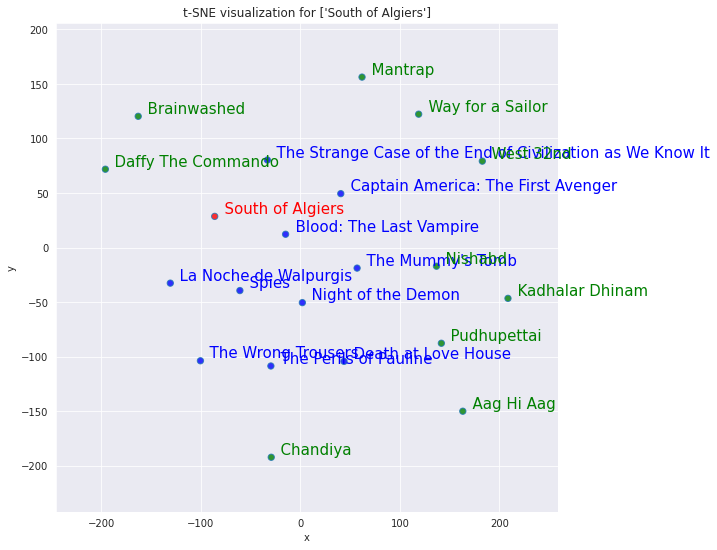

In [ ]:
tsnescatterplot(tfidf_vectors, 6)